# K_Mean Clustering

In [1]:
# Importing the dataset
import pandas as pd

df=pd.read_csv('../../Data/diamonds.csv')
# Data preporcessing steps
df.info() # no null values
df_ohe=pd.get_dummies(df)
#df_ohe=pd.get_dummies(df,columns=['carat','cut','color'],drop_first=True) # Humko columns ki values paar nahi pure data paar karna hai 
df_ohe.shape
#df_ohe # Theri is a beker column for us unnammeded
df_ohe.drop('Unnamed: 0',axis=1) # Not working for this data set i don't know why
df_ohe=df_ohe.iloc[:,1:]
df_ohe.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


(53940, 27)

# Apply Kmean Algoritherm

In [29]:
X=df_ohe

# now we have to train and test split data
#0.3 means 70 percent train data and 30 percent test data
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(X,train_size=0.3,random_state=7)

In [48]:
# import model
from sklearn.cluster import KMeans
mykmean=KMeans(3,random_state=7)
mykmean.fit(X_train)
clusterno=mykmean.predict(X_test)
print(clusterno)

print("Cluster 0",X_test.loc[clusterno==0].shape)
print("Cluster 1",X_test.loc[clusterno==2].shape)
print("Cluster 2",X_test.loc[clusterno==1].shape)




[0 1 0 ... 0 0 2]
Cluster 0 (23182, 27)
Cluster 1 (3901, 27)
Cluster 2 (10675, 27)


# Deciding The value of k Value Generally 2-10 
- wcss plotting means inertia_value of graph plot

In [42]:
inertia_values=[]
for k in range(2,11):
    kmean=KMeans(k,random_state=7)
    kmean.fit(X_train)
    inertia_values.append(kmean.inertia_)

inertia_values

[73839536872.03833,
 31617092541.758873,
 17269029688.939846,
 11256630149.789295,
 7522290548.666677,
 5439475892.341574,
 4275351459.712434,
 3369044080.8786335,
 2737665554.339264]

Ploting the graph

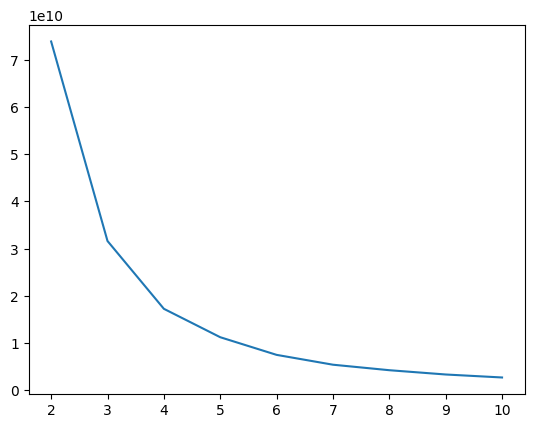

In [44]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)),inertia_values)

Fromm the above graph we can set the value as 3 or 4 as theris is a bend

Evaluate The parameters accuracty using silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test,clusterno) # we are havving better sihouette_score on k =3

np.float64(0.6619900211852966)